https://ikpy.readthedocs.io/en/latest/

In [1]:
import ikpy
import ikpy.chain

https://answers.ros.org/question/341365/urdf-attaching-two-joints-to-one-link-for-a-gripper/#:~:text=URDF%20models%20can%20describe%20mimic%20joints%20where%20the,the%20final%20joint%20wouldn%27t%20need%20adding%20at%20all.

How do we import a URDF file for use with ikpy?

try importing this way. This URDF has "mimic" links for use with parallel linkages. Is a way around the difficulty of closed chains. Might be a limitation we have to live with in ES302.

In [2]:
bot1 = ikpy.chain.Chain.from_urdf_file("mimic_parallel_link.urdf")

c:\users\alexander brown\appdata\local\programs\python\python39\lib\site-packages\ikpy\chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


now plot the robot (defined by the URDF file) for some arbitrary joint angles.

[0, -1, 0]


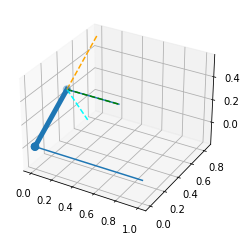

In [3]:
from matplotlib.pyplot import *

#make a list of joint angles, one for each joint on the robot
zero = [0] * len(bot1.links)
zero[1]=-1
print(zero)
#create an axis on which to plot
ax = figure().add_subplot(111, projection='3d')
#create a list of joints for plotting
#joints = ikpy.chain.convert_to_ik_angles(zero)

bot1.plot(zero,ax)

now interactively use goto (ik)

In [7]:
from ipywidgets import interact, FloatSlider

x, y, z = 0,0,0
size = 0.3

def goto(x, y, z):
    bot1.chain.goto((x, y, z), .1)
    
interact(goto, 
         x=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         y=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         z=FloatSlider(min=z-size, max=z+size, value=z, step=0.01))

AttributeError: 'Chain' object has no attribute 'chain'

<function __main__.goto(x, y, z)>